In [ ]:
### Preparing the IMDB data

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Training the model with Embedding and SimpleRNN layers

In [2]:
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 81s - loss: 0.4978 - acc: 0.7646 - val_loss: 0.3248 - val_acc: 0.8706
Epoch 2/10
20000/20000 [==============================] - 81s - loss: 0.2879 - acc: 0.8891 - val_loss: 0.3335 - val_acc: 0.8688
Epoch 3/10
20000/20000 [==============================] - 82s - loss: 0.2321 - acc: 0.9129 - val_loss: 0.3190 - val_acc: 0.8790
Epoch 4/10
20000/20000 [==============================] - 81s - loss: 0.1992 - acc: 0.9263 - val_loss: 0.3627 - val_acc: 0.8626
Epoch 5/10
20000/20000 [==============================] - 86s - loss: 0.1749 - acc: 0.9375 - val_loss: 0.3021 - val_acc: 0.8830
Epoch 6/10
20000/20000 [==============================] - 84s - loss: 0.1544 - acc: 0.9438 - val_loss: 0.5894 - val_acc: 0.8142
Epoch 7/10
20000/20000 [==============================] - 86s - loss: 0.1429 - acc: 0.9499 - val_loss: 0.3179 - val_acc: 0.8650
Epoch 8/10
20000/20000 [==============================]

### Plotting results

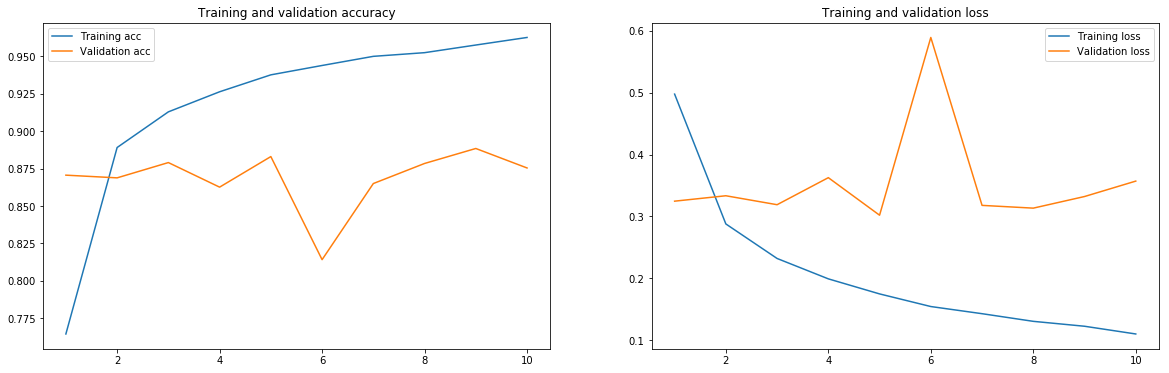

In [3]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()